# Laboratorio 5
## Data Science
#### Sección 40
Javier Alejandro Ovalle Chiquín, 22103  
José Ángel Morales Farfán, 22689  
Ricardo Josué Morales Contreras, 22289

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [15]:
# ==== Cargar CSV ====
df = pd.read_csv("tweets_texto_normalizados.csv")  
dfor = pd.read_csv("tweets.csv")

# Analisis exploratorio

Shape del dataset: (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason this earthquake allah forgive,1
1,4,NaN,NaN,forest fire near ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place being notified o...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,just sent this photo from ruby alaska smoke fr...,1



Tipos de datos y nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7605 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
id             0
keyword       61
location    2533
text           8
target         0
dtype: int64
----------------------------

Duplicados por id: 0
Duplicados por texto: 869
----------------------------


Balance de clases (target):
target
0    4342
1    3271
Name: count, dtype: int64
----------------------------


Estadísticas de longitud:
count    7613.000000
mean       60.688428
std        25.345176
min         3.000000
25%        42.000000
50%        61.000000
75%        80.000000
max       134.000000
Name: text_len, dtype: float64
---

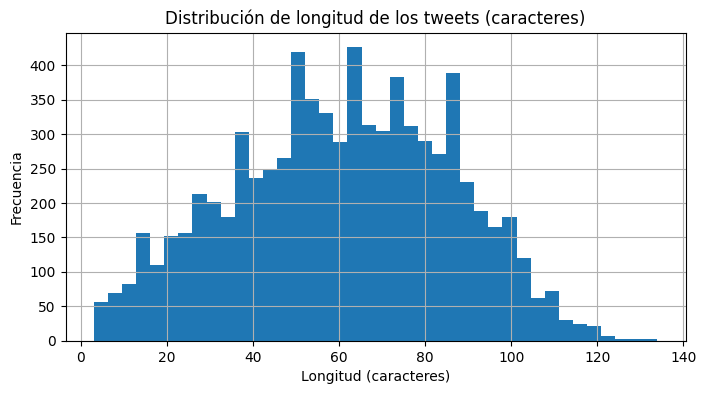

In [16]:
# ==== Vista rápida ====
print("Shape del dataset:", df.shape)
display(df.head())

# ==== Info de columnas ====
print("\nTipos de datos y nulos:")
print(df.info())
print(df.isna().sum())
print("----------------------------\n")

# ==== Revisar duplicados ====
dup_id = df["id"].duplicated().sum()
dup_text = df["text"].duplicated().sum()
print(f"Duplicados por id: {dup_id}")
print(f"Duplicados por texto: {dup_text}")
print("----------------------------\n")

# ==== Balance de clases ====
print("\nBalance de clases (target):")
print(df["target"].value_counts())
print("----------------------------\n")

# ==== Estadísticas de longitud de texto ====
df["text_len"] = df["text"].astype(str).str.len()
print("\nEstadísticas de longitud:")
print(df["text_len"].describe())
print("----------------------------\n")

# Histograma de longitudes
plt.figure(figsize=(8,4))
df["text_len"].hist(bins=40)
plt.title("Distribución de longitud de los tweets (caracteres)")
plt.xlabel("Longitud (caracteres)")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
#import pandas as pd
#import re
#import html
#import numpy as np

# === Función de limpieza ===
#def clean_text_for_classification(text: str) -> str:
#    text = str(text)
#    text = html.unescape(text)       # decodificar entidades HTML (&amp;)
#    text = text.lower()
#    text = re.sub(r"<.*?>", " ", text)                  # eliminar HTML
#    text = re.sub(r"http\S+|www\.\S+", " ", text)       # eliminar URLs
#    text = re.sub(r"@\w+", " ", text)                   # eliminar menciones
#    text = text.replace("#", " ")                       # quitar '#' pero dejar palabra
#    text = re.sub(r"[^\x00-\x7F]+", " ", text)          # quitar no-ASCII
#    # preservar "911" explícitamente
#    text = re.sub(r"\b911\b", " nineoneone_token ", text)
#    text = re.sub(r"\d+", " ", text)                    # eliminar números
#    text = re.sub(r"nineoneone_token", " 911 ", text)
#    text = re.sub(r"[^\w\s]", " ", text)                # quitar puntuación
#    text = re.sub(r"\s+", " ", text).strip()            # normalizar espacios
#    return text

# === 3. Crear la columna text_clean ===
#df["text_clean"] = df["text"].astype(str).apply(clean_text_for_classification)


In [17]:
df['text_original'] = dfor['text']

In [18]:
print(df.columns)

Index(['id', 'keyword', 'location', 'text', 'target', 'text_len',
       'text_original'],
      dtype='object')


Ahora se va a verificar las keywords, además de crear una columna secundaría de keywords para tener un argumento más robusto a la hora de verificar si el comentario es relacionado con un desastre o no 

In [20]:
# === 4. Preparar lista de keywords ===
keyword_list = df["keyword"].dropna().unique().tolist()
keyword_list = [k.lower().replace("%20", " ") for k in keyword_list]

extra_keywords = ["evacuation", "rescue", "explosion", "emergency", "burning"]
keywords = sorted(set(keyword_list + extra_keywords))

# === 5. Función para buscar keywords ===
def find_keywords(text, keyword_set):
    found = []
    for kw in keyword_set:
        if re.search(r"\b" + re.escape(kw) + r"\b", text):
            found.append(kw)
    return found

# === 6. Crear columnas de keywords ===
df["keywords_found"] = df["text"].apply(lambda x: find_keywords(str(x), keywords))
df["keyword_primary"] = df["keywords_found"].apply(lambda x: x[0] if len(x) > 0 else np.nan)
df["keyword_secondary"] = df["keywords_found"].apply(lambda x: x[1] if len(x) > 1 else np.nan)

# === 7. Ver resultado ===
print(df[["text", "keywords_found", "keyword_primary", "keyword_secondary"]].head(10))


                                                text  \
0         deeds reason this earthquake allah forgive   
1                 forest fire near ronge sask canada   
2  residents asked shelter place being notified o...   
3  people receive wildfires evacuation orders cal...   
4  just sent this photo from ruby alaska smoke fr...   
5  rockyfire update california closed both direct...   
6  flood disaster heavy rain causes flash floodin...   
7                                    hill fire woods   
8  there emergency evacuation happening building ...   
9                    afraid that tornado coming area   

                keywords_found keyword_primary keyword_secondary  
0                 [earthquake]      earthquake               NaN  
1          [fire, forest fire]            fire       forest fire  
2                 [evacuation]      evacuation               NaN  
3                 [evacuation]      evacuation               NaN  
4                      [smoke]           smoke  

Ahora para el modelo preeliminar de selección: 

Para el modelo preliminar de clasificación se propone utilizar un clasificador lineal, específicamente una Regresión Logística o un SVM lineal. Este enfoque resulta adecuado debido a que los mensajes en Twitter son cortos y los n-gramas permiten capturar de manera efectiva términos clave como “fire”, “earthquake” o “evacuation order”, los cuales son relevantes para identificar desastres. Aesta propuesta ofrece una solución práctica y efectiva para establecer una línea base sólida sobre la cual se pueden comparar modelos más avanzados en etapas posteriores del proyecto.